# Simulator demo

In [1]:
import src.data as data
import src.simulation as sim
import scanpy as sc
import episcanpy as epi
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import src.plots as myplt
import numpy as np
from pathlib import Path

%load_ext autoreload
%autoreload 2

In [2]:
file_path=Path('data/mouse_brain_5k/bin_by_cell_filtered.h5ad')

In [3]:
epidata = data.MouseBrainDataset()
adata = epidata.load_mtx(matrix_path=file_path)

In [4]:
# simulation_params = {'nCells': 1000, 
#                      # 'noise.mean': -0.3, 'noise.sd': 0.3, 
#                      # 'is_peak_mtx': True, 'peak_num': 1000
#                     }
# adata_sim = sim.simulate(adata, **simulation_params)

In [5]:
annotation_name = 'cell_type'
simulation_params = {'nCells': 50, 
                     'noise.mean': -0.3, 'noise.sd': 0.3, 
                     # 'is_peak_mtx': True, 'peak_num': 1000
                    }
adata_sim = sim.simulate_by_annotation(adata, annotation_name=annotation_name, **simulation_params)

In [6]:
adata_sim

AnnData object with n_obs × n_vars = 550 × 15032
    obs: 'Cell', 'LibSize', 'cell_type'
    var: 'chr', 'start', 'stop', 'n_cells', 'log_n_cells', 'passes_filter'

## Simulated lib size

In [7]:
adata_sim.obs['actualLibSize'] = np.ravel(adata_sim.X.sum(1))

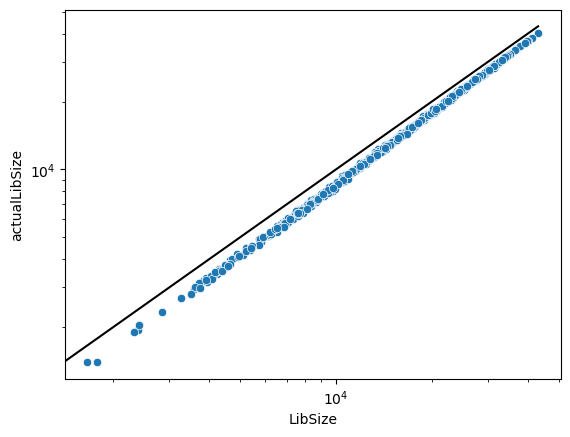

In [8]:
fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(adata_sim.obs, x='LibSize', y='actualLibSize', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
_max = np.max(adata_sim.obs['LibSize'])
ax.plot((0,_max), (0,_max),color='black')

In [9]:
epi.pp.qc_stats(adata_sim, verbose=True)

added keys n_cells, log_n_cells to .var
added keys n_features, log_n_features, n_counts, log_n_counts to .obs


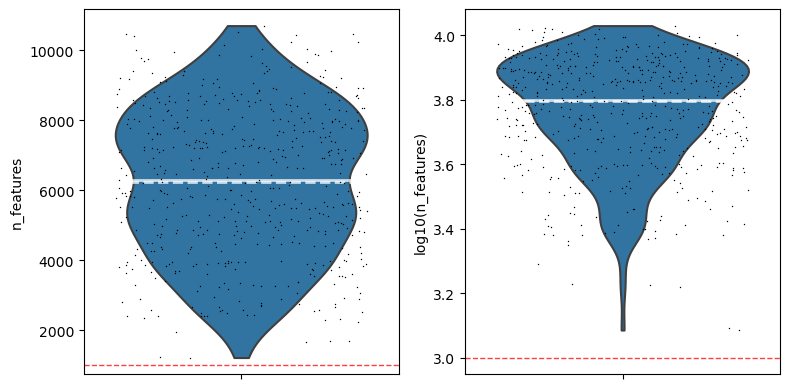

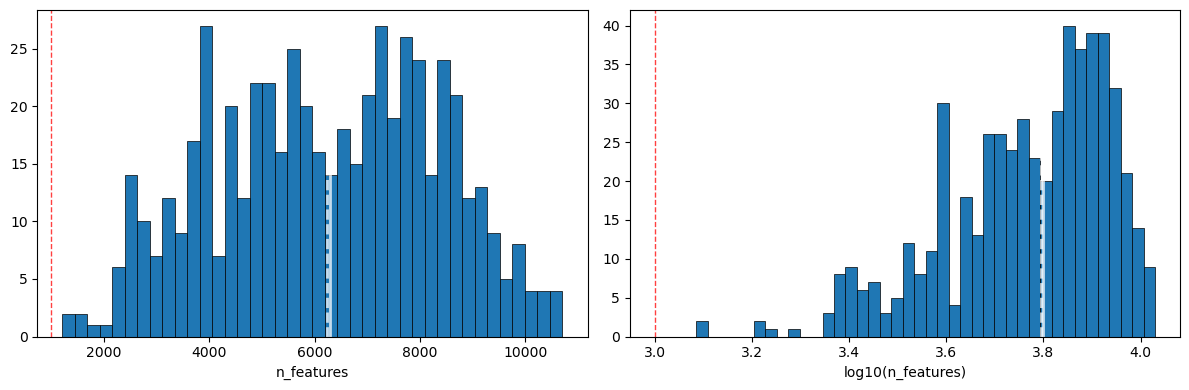

Max:	10706
Median:	6291.5
Mean:	6232.46
Min:	1217


In [10]:
min_features = 1000
max_features = None

epi.pl.violin(adata_sim, "n_features", min_threshold=min_features, max_threshold=max_features, show_log=True, show_mean=True, show_median=True, print_statistics=False, save=None)
epi.pl.histogram(adata_sim, "n_features", bins=40, min_threshold=min_features, max_threshold=max_features, show_log=True, show_mean=True, show_median=True, print_statistics=True, save=None)

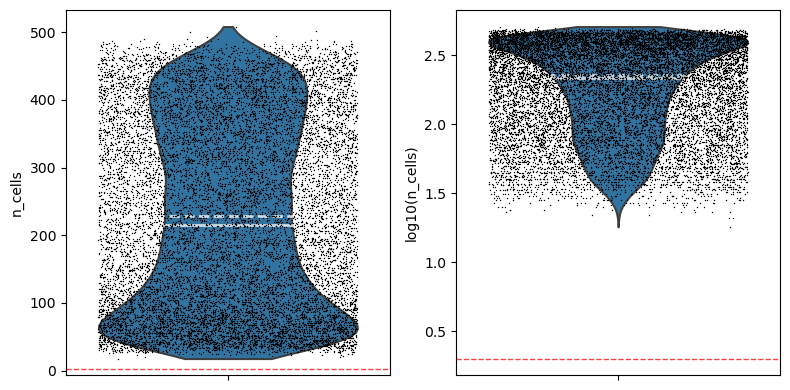

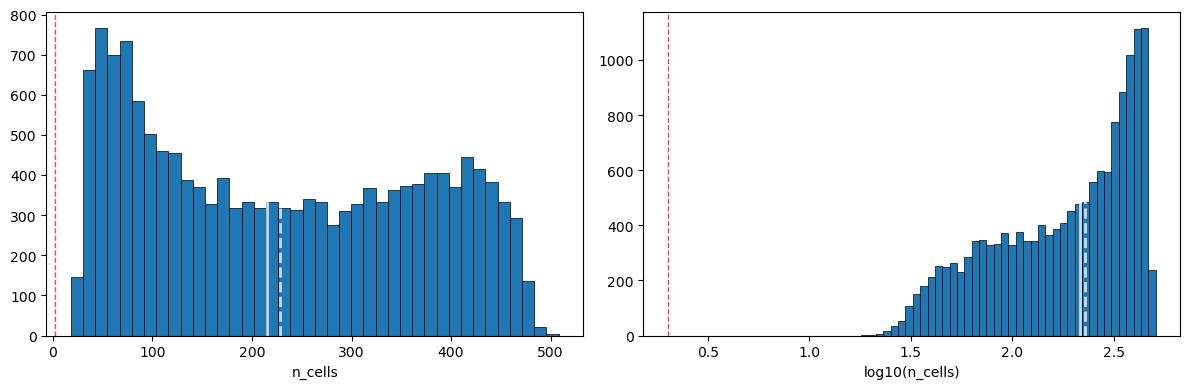

Max:	508
Median:	215.0
Mean:	228.03705428419372
Min:	18


In [11]:
min_cells = 2
max_cells = None

epi.pl.violin(adata_sim, "n_cells", min_threshold=min_cells, max_threshold=max_cells, show_log=True, show_mean=True, show_median=True, print_statistics=False, save=None)
epi.pl.histogram(adata_sim, "n_cells", bins=40, min_threshold=min_cells, max_threshold=max_cells, show_log=True, show_mean=True, show_median=True, print_statistics=True, save=None)

### Set, check, and apply filters

In [12]:
epi.pp.set_filter(adata_sim, "n_features", min_threshold=min_features, max_threshold=max_features)
epi.pp.set_filter(adata_sim, "n_cells", min_threshold=min_cells)

550 of 550 observations remain (0)
15032 of 15032 features remain (0)


In [13]:
adata_sim = epi.pp.apply_filters(adata_sim, verbose=True)

550 of 550 observations remain (0)
15032 of 15032 features remain (0)


In [14]:
adata_sim.write_h5ad(file_path.parent / (file_path.stem + 'simulated.h5ad'))